**Atividade Realizada por:**
* Georges Ballister de Oliveira

DataSet:[Multiple Disease Prediction](https://www.kaggle.com/datasets/ehababoelnaga/multiple-disease-prediction)





---


## Importando as bibliotecas e o dataset



In [ ]:
# Bibliotecas
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import svm
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

: 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Leitura do CSV
db_dados = pd.read_csv('/content/drive/My Drive/Atividade Carlos/Blood_samples_dataset_balanced_2(f).csv', sep=',')

In [4]:
# Retorna a quantidade de linhas e colunas no DataFrame.
db_dados.shape

(2351, 25)

## Limpeza dos dados


In [5]:
# Procura por todos os valores que são nulos na base de dados.
db_dados.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [6]:
# Remove todos os valores que são nulos.
dados_limpos = db_dados.dropna()
dados_limpos.shape

(2351, 25)

In [7]:
# Exibe todas as colunas no DataFrame/.
dados_limpos.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [8]:
# Gera uma visão tabelada do DataFrame.
dados_limpos.head(1-2)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,0.652122,0.478195,0.597916,0.425360,0.942047,1.000000,0.493428,0.328170,0.172450,0.693244,...,0.731775,0.640133,0.398199,0.214581,0.620868,0.335346,0.459722,0.713162,0.332335,Healthy
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia


In [9]:
# Traduz os nomes das colunas para o português.
dados_limpos = dados_limpos.rename({
    'Glucose': 'Glicose',
    'Cholesterol': 'Colesterol',
    'Hemoglobin': 'Hemoglobina',
    'Platelets': 'Plaquetas',
    'White Blood Cells': 'Leucócitos',
    'Red Blood Cells': 'Eritrócitos',
    'Hematocrit': 'Hematócrito',
    'Mean Corpuscular Volume': 'Volume Corpuscular Médio',
    'Mean Corpuscular Hemoglobin': 'Hemoglobina Corpuscular Média',
    'Mean Corpuscular Hemoglobin Concentration': 'Concentração de Hemoglobina Corpuscular Média',
    'Insulin': 'Insulina',
    'BMI': 'IMC',
    'Systolic Blood Pressure': 'Pressão Arterial Sistólica',
    'Diastolic Blood Pressure': 'Pressão Arterial Diastólica',
    'Triglycerides': 'Triglicerídeos',
    'HbA1c': 'Hemoglobina glicada',
    'LDL Cholesterol': 'Colesterol LDL',
    'HDL Cholesterol': 'Colesterol HDL',
    'ALT': 'TGP (Alanina Aminotransferase)',
    'AST': 'TGO (Aspartato Aminotransferase)',
    'Heart Rate': 'Frequência Cardíaca',
    'Creatinine': 'Creatinina',
    'Troponin': 'Troponina',
    'C-reactive Protein': 'Proteína C-Reativa',
    'Disease': 'Doença'
}, axis=1)

dados_limpos.head(1-5)

,Glicose,Colesterol,Hemoglobina,Plaquetas,Leucócitos,Eritrócitos,Hematócrito,Volume Corpuscular Médio,Hemoglobina Corpuscular Média,Concentração de Hemoglobina Corpuscular Média,...,Hemoglobina glicada,Colesterol LDL,Colesterol HDL,TGP (Alanina Aminotransferase),TGO (Aspartato Aminotransferase),Frequência Cardíaca,Creatinina,Troponina,Proteína C-Reativa,Doença
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,0.298953,0.809215,0.781105,0.620757,0.910493,0.619904,0.953790,0.778876,0.267350,0.964606,...,0.554384,0.747632,0.977227,0.169325,0.403087,0.693313,0.755205,0.489431,0.093951,Diabetes
2343,0.143772,0.089600,0.027259,0.171121,0.744950,0.452787,0.871778,0.995263,0.872038,0.311175,...,0.133001,0.261072,0.200323,0.363050,0.558191,0.304237,0.306539,0.566289,0.754189,Thalasse
2344,0.357817,0.250056,0.466870,0.624206,0.618684,0.545752,0.245236,0.453052,0.162934,0.670361,...,0.537799,0.411453,0.484999,0.235162,0.566215,0.403785,0.737241,0.388105,0.406190,Healthy
2345,0.652122,0.478195,0.597916,0.425360,0.942047,1.000000,0.493428,0.328170,0.172450,0.693244,...,0.731775,0.640133,0.398199,0.214581,0.620868,0.335346,0.459722,0.713162,0.332335,Healthy


In [10]:
# Exibe as colunas com os nomes traduzidos.
dados_limpos.columns

Index(['Glicose', 'Colesterol', 'Hemoglobina', 'Plaquetas', 'Leucócitos',
       'Eritrócitos', 'Hematócrito', 'Volume Corpuscular Médio',
       'Hemoglobina Corpuscular Média',
       'Concentração de Hemoglobina Corpuscular Média', 'Insulina', 'IMC',
       'Pressão Arterial Sistólica', 'Pressão Arterial Diastólica',
       'Triglicerídeos', 'Hemoglobina glicada', 'Colesterol LDL',
       'Colesterol HDL', 'TGP (Alanina Aminotransferase)',
       'TGO (Aspartato Aminotransferase)', 'Frequência Cardíaca', 'Creatinina',
       'Troponina', 'Proteína C-Reativa', 'Doença'],
      dtype='object')

### Verificando valores

Nessa parte de verificação de valores, estamos filtrando quais valores existem para trabalharmos com os que há mais linhas

In [11]:
# Retorna a quantidade de registro por tipo de doença
porcentagem_valor_disease = dados_limpos['Doença'].value_counts()
print(porcentagem_valor_disease)

Doença
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64


In [12]:
# Gera uma visão tabelada do DataFrame com os dados tratados.
dados_tratados = dados_limpos
dados_tratados.head(1-2)

,Glicose,Colesterol,Hemoglobina,Plaquetas,Leucócitos,Eritrócitos,Hematócrito,Volume Corpuscular Médio,Hemoglobina Corpuscular Média,Concentração de Hemoglobina Corpuscular Média,...,Hemoglobina glicada,Colesterol LDL,Colesterol HDL,TGP (Alanina Aminotransferase),TGO (Aspartato Aminotransferase),Frequência Cardíaca,Creatinina,Troponina,Proteína C-Reativa,Doença
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,0.652122,0.478195,0.597916,0.425360,0.942047,1.000000,0.493428,0.328170,0.172450,0.693244,...,0.731775,0.640133,0.398199,0.214581,0.620868,0.335346,0.459722,0.713162,0.332335,Healthy
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia


In [13]:
#Selecionando apenas as colunas que serão utilizadas.
colunas_a_usar = ['Glicose', 'Colesterol', 'Hemoglobina', 'Plaquetas', 'Leucócitos',
       'Eritrócitos', 'Hematócrito', 'Volume Corpuscular Médio',
       'Hemoglobina Corpuscular Média',
       'Concentração de Hemoglobina Corpuscular Média', 'Insulina', 'IMC',
       'Pressão Arterial Sistólica', 'Pressão Arterial Diastólica',
       'Triglicerídeos', 'Hemoglobina glicada', 'Colesterol LDL',
       'Colesterol HDL', 'TGP (Alanina Aminotransferase)',
       'TGO (Aspartato Aminotransferase)', 'Frequência Cardíaca', 'Creatinina',
       'Troponina', 'Proteína C-Reativa']

df_selecionado = dados_tratados[colunas_a_usar]


In [14]:
#media dos valores (variavel).
media_colunas = df_selecionado.mean(axis=1)
print(media_colunas)

0       0.462510
1       0.523453
2       0.424218
3       0.305213
4       0.439025
          ...   
2346    0.460735
2347    0.503865
2348    0.479935
2349    0.395672
2350    0.373714
Length: 2351, dtype: float64


In [15]:
# Gera dados estatístico das colunas selecionadas.
dados_tratados[['Insulina',
                'Hemoglobina glicada',
                'IMC',
                'Triglicerídeos',
                'Colesterol HDL']].describe()

,Insulina,Hemoglobina glicada,IMC,Triglicerídeos,Colesterol HDL
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.447062,0.439112,0.436679,0.374373,0.546079
std,0.242861,0.263779,0.242865,0.256981,0.269511
min,0.034129,0.016256,0.014596,0.005217,0.039505
25%,0.219111,0.188750,0.246885,0.184604,0.307132
50%,0.444806,0.466375,0.443725,0.317857,0.512941
75%,0.654441,0.652514,0.601662,0.572330,0.779378
max,0.966784,0.950218,0.898210,0.973679,0.989411


## Normalização e padronização

In [16]:
# Realiza a normalização e padronização dos valores númericos do dataset
dados_numericos = dados_tratados.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dados_numericos)
dados_normalizados_df = pd.DataFrame(dados_normalizados, columns=dados_numericos.columns)

dados_padronizados = pd.concat([dados_tratados.select_dtypes(exclude=['float64', 'int64']), dados_normalizados_df], axis=1)
dados_padronizados.head(1-5)

dados_padronizados = pd.concat([dados_tratados.select_dtypes(exclude=['float64', 'int64']), dados_normalizados_df], axis=1)
dados_padronizados.head(1-5)

,Doença,Glicose,Colesterol,Hemoglobina,Plaquetas,Leucócitos,Eritrócitos,Hematócrito,Volume Corpuscular Médio,Hemoglobina Corpuscular Média,...,Triglicerídeos,Hemoglobina glicada,Colesterol LDL,Colesterol HDL,TGP (Alanina Aminotransferase),TGO (Aspartato Aminotransferase),Frequência Cardíaca,Creatinina,Troponina,Proteína C-Reativa
0,Healthy,0.760970,0.714602,0.724901,0.867347,0.690661,0.507968,0.288102,0.615934,0.000804,...,0.669366,0.520802,0.191970,0.498402,0.060940,0.609115,0.934958,0.082097,0.474941,0.963841
1,Diabetes,0.115714,0.012229,0.960815,0.904721,0.507392,0.375188,0.157851,0.274814,0.215424,...,0.487913,0.899987,0.651488,0.071013,1.000000,0.337510,0.625415,0.705019,0.838580,0.499722
2,Thalasse,0.461160,0.116471,0.552430,0.393237,0.290012,0.353197,0.635253,0.261705,0.901457,...,0.086449,0.482396,0.372632,0.402416,0.000000,0.503242,0.359453,0.437783,0.820029,0.976422
3,Anemia,0.131196,0.003882,0.425321,0.181286,0.072431,0.127323,0.063703,0.655661,0.129735,...,0.414379,0.000000,0.007467,0.828730,0.276074,0.592121,0.126037,0.518533,0.652194,0.440365
4,Thalasse,0.173106,0.828862,0.988242,0.783028,0.442301,0.413724,0.914544,0.416755,0.266687,...,0.422515,0.442390,0.119118,0.191670,0.008653,0.564577,0.823805,0.146029,0.814780,0.113617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,Diabetes,0.300751,0.892695,0.793732,0.616299,0.918123,0.602175,0.975428,0.771821,0.277139,...,0.196478,0.576178,0.751581,0.987173,0.173343,0.397448,0.655953,0.811295,0.499259,0.112332
2343,Thalasse,0.138676,0.086753,0.024725,0.160647,0.749313,0.427263,0.890507,1.000000,0.905268,...,0.007720,0.125001,0.239838,0.169298,0.380455,0.555484,0.214985,0.315358,0.578879,0.944875
2344,Healthy,0.362230,0.266457,0.473178,0.619794,0.620555,0.524565,0.241745,0.428241,0.168675,...,0.061101,0.558420,0.398002,0.468987,0.243729,0.563660,0.327810,0.791437,0.394291,0.506057
2345,Healthy,0.669609,0.521965,0.606859,0.418288,0.950299,1.000000,0.498738,0.296554,0.178560,...,0.488502,0.766112,0.638517,0.377610,0.221726,0.619346,0.250244,0.484680,0.731030,0.412928


## Tratamento com Outliers

In [17]:
#Mean é um metodo do pandas
mean = dados_tratados[['Glicose', 'Colesterol', 'Hemoglobina', 'Plaquetas', 'Leucócitos',
       'Eritrócitos', 'Hematócrito', 'Volume Corpuscular Médio',
       'Hemoglobina Corpuscular Média',
       'Concentração de Hemoglobina Corpuscular Média', 'Insulina', 'IMC',
       'Pressão Arterial Sistólica', 'Pressão Arterial Diastólica',
       'Triglicerídeos', 'Hemoglobina glicada', 'Colesterol LDL',
       'Colesterol HDL', 'TGP (Alanina Aminotransferase)',
       'TGO (Aspartato Aminotransferase)', 'Frequência Cardíaca', 'Creatinina',
       'Troponina', 'Proteína C-Reativa']].mean()

# Desvio padrão
std_dev = dados_tratados[['Glicose', 'Colesterol', 'Hemoglobina', 'Plaquetas', 'Leucócitos',
       'Eritrócitos', 'Hematócrito', 'Volume Corpuscular Médio',
       'Hemoglobina Corpuscular Média',
       'Concentração de Hemoglobina Corpuscular Média', 'Insulina', 'IMC',
       'Pressão Arterial Sistólica', 'Pressão Arterial Diastólica',
       'Triglicerídeos', 'Hemoglobina glicada', 'Colesterol LDL',
       'Colesterol HDL', 'TGP (Alanina Aminotransferase)',
       'TGO (Aspartato Aminotransferase)', 'Frequência Cardíaca', 'Creatinina',
       'Troponina', 'Proteína C-Reativa']].std()


print("Valor da variavel mean: ", mean,"\n")

print("\nValor da variavel std_dev: ", std_dev)

Valor da variavel mean:  Glicose                                          0.362828
Colesterol                                       0.393648
Hemoglobina                                      0.586190
Plaquetas                                        0.504027
Leucócitos                                       0.511086
Eritrócitos                                      0.506590
Hematócrito                                      0.507152
Volume Corpuscular Médio                         0.492200
Hemoglobina Corpuscular Média                    0.484459
Concentração de Hemoglobina Corpuscular Média    0.562273
Insulina                                         0.447062
IMC                                              0.436679
Pressão Arterial Sistólica                       0.381211
Pressão Arterial Diastólica                      0.421708
Triglicerídeos                                   0.374373
Hemoglobina glicada                              0.439112
Colesterol LDL                                 

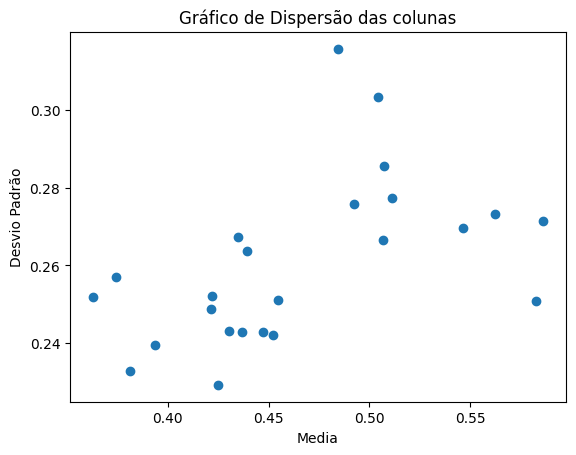

In [18]:
x = [mean]
y = [std_dev]

plt.scatter(x, y)

plt.xlabel('Media')
plt.ylabel('Desvio Padrão')
plt.title('Gráfico de Dispersão das colunas')

plt.show()

In [19]:
dados_tratados_copy = dados_tratados.copy()


## Identificando o balanceamento das classe

In [20]:
class_diabetes = dados_tratados['Hemoglobina glicada'].value_counts()

print(class_diabetes)

Hemoglobina glicada
0.120251    51
0.738542    49
0.026747    47
0.029015    47
0.466795    46
            ..
0.699198    26
0.533627    25
0.313360    25
0.237960    23
0.670665    23
Name: count, Length: 65, dtype: int64


## Balanceando as classes

In [21]:
dados_tratados_balanceados = dados_tratados

In [22]:
dados_tratados_balanceados2 = dados_tratados.copy()

## Aprendizado de maquina

### Treinamento 1

In [23]:
# Realiza o treinameto, cria o modelo e aplica ao dados tratados.
X = dados_tratados_balanceados.drop('Doença', axis=1)
y = dados_tratados_balanceados['Doença'].apply(lambda x:
                                               x if x in ['Diabetes', 'Anemia']
                                               else 'Outra')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

dados_tratados_balanceados['Previsão'] = model.predict(X)
dados_tratados_balanceados.head(1-2)

,Glicose,Colesterol,Hemoglobina,Plaquetas,Leucócitos,Eritrócitos,Hematócrito,Volume Corpuscular Médio,Hemoglobina Corpuscular Média,Concentração de Hemoglobina Corpuscular Média,...,Colesterol LDL,Colesterol HDL,TGP (Alanina Aminotransferase),TGO (Aspartato Aminotransferase),Frequência Cardíaca,Creatinina,Troponina,Proteína C-Reativa,Doença,Previsão
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy,Outra
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse,Outra
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse,Outra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,0.652122,0.478195,0.597916,0.425360,0.942047,1.000000,0.493428,0.328170,0.172450,0.693244,...,0.640133,0.398199,0.214581,0.620868,0.335346,0.459722,0.713162,0.332335,Healthy,Outra
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse,Outra
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia,Anemia


In [24]:
# Realiza o oversampling para igualar as classes minoritarias e ajusta no modelo.
print("Contagem de classes antes do oversampling:", Counter(y_train))
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

print("Contagem de classes após o oversampling:", Counter(y_train_resampled))

model.fit(X_train_resampled, y_train_resampled)


Contagem de classes antes do oversampling: Counter({'Outra': 963, 'Anemia': 489, 'Diabetes': 428})
Contagem de classes após o oversampling: Counter({'Outra': 963, 'Diabetes': 963, 'Anemia': 963})


DecisionTreeClassifier(random_state=42)

In [25]:
# Demonstra a acurácia de teste e de treinamento do nosso modelo
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train_percent = accuracy_train * 100
print("Acurácia no conjunto de treinamento:", "{:.2f}%".format(accuracy_train_percent))

accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_test_percent = accuracy_test * 100
print("Acurácia no conjunto de teste:", "{:.2f}%".format(accuracy_test_percent))


Acurácia no conjunto de treinamento: 100.00%
Acurácia no conjunto de teste: 100.00%


In [26]:
# Filtra por valores com as doenças que esta sendo trabalhada e faz a comparação de acurácia manual.
valores_para_remover = ['Thalasse', 'Heart Di', 'Thromboc', 'Healthy']
teste_acuracia = dados_limpos[~dados_limpos['Doença'].isin(valores_para_remover)]
comparacao = teste_acuracia[teste_acuracia['Doença'] == teste_acuracia['Previsão']]
comparacao.head(1-2)


,Glicose,Colesterol,Hemoglobina,Plaquetas,Leucócitos,Eritrócitos,Hematócrito,Volume Corpuscular Médio,Hemoglobina Corpuscular Média,Concentração de Hemoglobina Corpuscular Média,...,Colesterol LDL,Colesterol HDL,TGP (Alanina Aminotransferase),TGO (Aspartato Aminotransferase),Frequência Cardíaca,Creatinina,Troponina,Proteína C-Reativa,Doença,Previsão
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes,Diabetes
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia,Anemia
5,0.898222,0.258706,0.933307,0.353082,0.373952,0.297138,0.900010,0.985488,0.679007,0.355774,...,0.529914,0.222687,0.772461,0.119994,0.894273,0.128124,0.379016,0.751438,Diabetes,Diabetes
10,0.407043,0.248231,0.295620,0.055934,0.044499,0.416145,0.548540,0.338914,0.906910,0.722286,...,0.450078,0.989411,0.087708,0.317984,0.743462,0.206610,0.594778,0.293962,Anemia,Anemia
11,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,0.729868,0.905026,0.520473,0.306955,0.743164,0.667150,0.769573,0.183771,0.246542,0.161920,...,0.977656,0.341007,0.797158,0.994460,0.591303,0.425296,0.007490,0.196192,Diabetes,Diabetes
2342,0.298953,0.809215,0.781105,0.620757,0.910493,0.619904,0.953790,0.778876,0.267350,0.964606,...,0.747632,0.977227,0.169325,0.403087,0.693313,0.755205,0.489431,0.093951,Diabetes,Diabetes
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes,Diabetes
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia,Anemia


In [27]:
# Faz o teste de acurácia manual para verificar se de fato há 100% de acerto.
num_acertos = comparacao.shape[0]
num_total = teste_acuracia.shape[0]
porcentagem_acertos = (num_acertos / num_total) * 100

print("Porcentagem de acertos:", "{:.2f}%".format(porcentagem_acertos))


Porcentagem de acertos: 100.00%


In [28]:
# Gera 10 mil dados mockados para que o nosso modelo possa determinar a doença.
columns = ['Glicose', 'Colesterol', 'Hemoglobina', 'Plaquetas', 'Leucócitos',
           'Eritrócitos', 'Hematócrito', 'Volume Corpuscular Médio',
           'Hemoglobina Corpuscular Média',
           'Concentração de Hemoglobina Corpuscular Média', 'Insulina', 'IMC',
           'Pressão Arterial Sistólica', 'Pressão Arterial Diastólica',
           'Triglicerídeos', 'Hemoglobina glicada', 'Colesterol LDL',
           'Colesterol HDL', 'TGP (Alanina Aminotransferase)',
           'TGO (Aspartato Aminotransferase)', 'Frequência Cardíaca', 'Creatinina',
           'Troponina', 'Proteína C-Reativa']

dataset = []
for _ in range(10000):
    data = {}
    for colun in columns:
        random_number = random.uniform(0, 1000)
        normalized_value = round(random_number / 1000, 16)
        data[colun] = normalized_value
    dataset.append(data)

new_dataset = pd.DataFrame(dataset, columns=columns)


In [29]:
# Aplica o nosso modelo no novo dataset e imprime o diagnóstico.
novos_dados = new_dataset
previsao = model.predict(novos_dados)
novos_dados['Previsão'] = previsao
novos_dados.head(1-2)

,Glicose,Colesterol,Hemoglobina,Plaquetas,Leucócitos,Eritrócitos,Hematócrito,Volume Corpuscular Médio,Hemoglobina Corpuscular Média,Concentração de Hemoglobina Corpuscular Média,...,Hemoglobina glicada,Colesterol LDL,Colesterol HDL,TGP (Alanina Aminotransferase),TGO (Aspartato Aminotransferase),Frequência Cardíaca,Creatinina,Troponina,Proteína C-Reativa,Previsão
0,0.578138,0.336755,0.028746,0.109831,0.929791,0.520441,0.791311,0.601645,0.930465,0.756788,...,0.388363,0.278210,0.337767,0.965004,0.190460,0.906047,0.241559,0.011493,0.357528,Outra
1,0.688895,0.883344,0.013273,0.373263,0.764977,0.667472,0.883558,0.998708,0.156140,0.142798,...,0.201065,0.239593,0.366303,0.389565,0.297620,0.788658,0.817630,0.051528,0.077424,Diabetes
2,0.569400,0.778206,0.935518,0.242760,0.806140,0.248341,0.542705,0.420014,0.698277,0.885622,...,0.966680,0.438029,0.576052,0.701890,0.540825,0.183680,0.499840,0.193026,0.182658,Diabetes
3,0.834340,0.180436,0.452074,0.070846,0.116703,0.637973,0.814602,0.555136,0.503113,0.546543,...,0.733827,0.417517,0.632260,0.202362,0.691836,0.214931,0.845009,0.378717,0.250989,Anemia
4,0.794509,0.887823,0.777002,0.105034,0.157922,0.129544,0.168076,0.264726,0.075511,0.726945,...,0.704842,0.034859,0.140892,0.930267,0.733449,0.016539,0.672650,0.967373,0.646452,Anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.676789,0.371884,0.061485,0.856077,0.214067,0.753651,0.390796,0.510161,0.156686,0.918826,...,0.522719,0.881661,0.873959,0.958481,0.099573,0.311894,0.833578,0.859831,0.271498,Outra
9995,0.583291,0.329707,0.676204,0.357102,0.052326,0.120062,0.934334,0.950005,0.897877,0.277393,...,0.334008,0.331035,0.283011,0.048889,0.522248,0.918749,0.178182,0.051843,0.055692,Diabetes
9996,0.748842,0.654480,0.065570,0.071571,0.512190,0.398394,0.202958,0.536595,0.985880,0.981094,...,0.683939,0.192688,0.654973,0.833476,0.287223,0.409948,0.813905,0.599594,0.611941,Outra
9997,0.890486,0.393232,0.843266,0.509818,0.834005,0.090477,0.877902,0.265320,0.018926,0.145628,...,0.101452,0.476390,0.007205,0.935627,0.179861,0.368172,0.907514,0.481149,0.275562,Diabetes


### Treinamento 2

In [36]:
# Realiza o treinameto, cria o modelo e aplica ao dados tratados.
X = dados_tratados_balanceados2 .drop('Doença', axis=1)
y = dados_tratados_balanceados2 ['Doença'].apply(lambda x: x if x in ['Diabetes', 'Anemia'] else 'Outra')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.SVC(kernel='linear')  # Vamos usar um kernel linear para este exemplo
clf.fit(X_train, y_train)

y_predicao = clf.predict(X_test)


accuracia_treinamento2 = accuracy_score(y_test, y_predicao)
print("Acurácia do modelo:", (round(accuracia_treinamento2)*100),"%")



Acurácia do modelo: 100 %


In [31]:

novos_dados_2 = new_dataset
previsao2 = model.predict(novos_dados_2.drop('Previsão', axis=1))


In [32]:
novos_dados_2['Previsao 2'] = previsao2
novos_dados_2.head(1-5)


,Glicose,Colesterol,Hemoglobina,Plaquetas,Leucócitos,Eritrócitos,Hematócrito,Volume Corpuscular Médio,Hemoglobina Corpuscular Média,Concentração de Hemoglobina Corpuscular Média,...,Colesterol LDL,Colesterol HDL,TGP (Alanina Aminotransferase),TGO (Aspartato Aminotransferase),Frequência Cardíaca,Creatinina,Troponina,Proteína C-Reativa,Previsão,Previsao 2
0,0.578138,0.336755,0.028746,0.109831,0.929791,0.520441,0.791311,0.601645,0.930465,0.756788,...,0.278210,0.337767,0.965004,0.190460,0.906047,0.241559,0.011493,0.357528,Outra,Outra
1,0.688895,0.883344,0.013273,0.373263,0.764977,0.667472,0.883558,0.998708,0.156140,0.142798,...,0.239593,0.366303,0.389565,0.297620,0.788658,0.817630,0.051528,0.077424,Diabetes,Diabetes
2,0.569400,0.778206,0.935518,0.242760,0.806140,0.248341,0.542705,0.420014,0.698277,0.885622,...,0.438029,0.576052,0.701890,0.540825,0.183680,0.499840,0.193026,0.182658,Diabetes,Diabetes
3,0.834340,0.180436,0.452074,0.070846,0.116703,0.637973,0.814602,0.555136,0.503113,0.546543,...,0.417517,0.632260,0.202362,0.691836,0.214931,0.845009,0.378717,0.250989,Anemia,Anemia
4,0.794509,0.887823,0.777002,0.105034,0.157922,0.129544,0.168076,0.264726,0.075511,0.726945,...,0.034859,0.140892,0.930267,0.733449,0.016539,0.672650,0.967373,0.646452,Anemia,Anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0.140700,0.629404,0.072295,0.052780,0.761729,0.926220,0.926170,0.341224,0.799127,0.441948,...,0.329646,0.745323,0.852404,0.906710,0.622239,0.738804,0.482276,0.007980,Diabetes,Diabetes
9992,0.231031,0.042779,0.034206,0.581616,0.928773,0.293439,0.168489,0.139572,0.138865,0.166228,...,0.437513,0.395145,0.134208,0.260577,0.089169,0.673284,0.182218,0.954490,Outra,Outra
9993,0.029605,0.459362,0.426777,0.820058,0.781890,0.340376,0.660141,0.445073,0.658536,0.931097,...,0.477102,0.992215,0.869917,0.101811,0.695350,0.411325,0.249183,0.651464,Outra,Outra
9994,0.676789,0.371884,0.061485,0.856077,0.214067,0.753651,0.390796,0.510161,0.156686,0.918826,...,0.881661,0.873959,0.958481,0.099573,0.311894,0.833578,0.859831,0.271498,Outra,Outra


### Grafico de categoria de distribuição

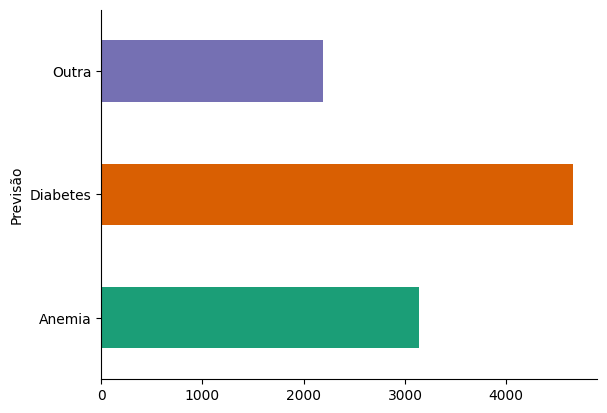

In [33]:
_df_4 = novos_dados_2
_df_4.groupby('Previsão').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)